In [8]:
import os, sys
sys.path.append('../')
from utils import * 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from IPython.display import clear_output

In [4]:
ad = '43.63115031960341, 6.206004981454061'
h = '700'
w = '700'
zoom = '20'
a = picture_address(ad, h, w, zoom)
a.save_picture(folder = './to_predict')

In [13]:
!python yolov5/detect.py --weights model/weights/best.pt --data yolov5/data/pool_dataset.yaml --conf 0.7 --source ./to_predict --project inference --augment --line=2
#clear_output()

detect: weights=['model/weights/best.pt'], source=./to_predict, data=yolov5/data/pool_dataset.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=inference, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-12-g7f5724b Python-3.9.7 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\alexa\Desktop\FR\Courses\python_labs\POOL_AI\to_predict\43.63115031960341, 6.206004981454061_700x700.png: 640x640 1 POOL, 94.1ms
Speed: 0.0ms pre-process, 94.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to inference\exp6


In [14]:
last_run = glob.glob(f"inference/*")[-1]
last_pic = glob.glob(f'{last_run}/*.png')

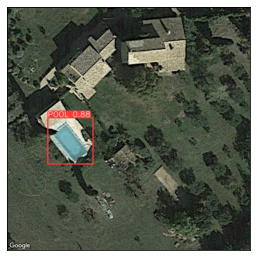

In [16]:
detect_path = glob.glob(f"inference/*")[-1]
images = []
for img_path in glob.glob(detect_path + '/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)